## Análise da variação dos leitos disponíveis em Goiás ao longo do tempo

- César Augusto Noronha
- cesarsnoronha@gmail.com


___

Desafio: Desenvolva uma análise exploratória que descreva a evolução da capacidade hospitalar (número de leitos) durante a pandemia de Covid-19 em Goiás. Você pode realizar a análise sobre qualquer perspectiva, mas abaixo listamos algumas sugestões:
- Compare a distribuição geográfica dos leitos por município antes e depois da pandemia; ou
- Analise a evolução do número de leitos no tempo;
- Verifique se em algum momento pôde ser observado um declínio na capacidade hospitalar instalada;
- Comparar a quantidade de leitos SUS e leitos não SUS no tempo e no espaço

---

#### Dicionário das variáveis

Tipo CHAR
- CODUFMUN: Código do município do estabelecimento UF+ MUNIC (sem dígito)
- TP LEITO: Tipo do LEITO
- CODLEITO: Especialidade do LEITO

Tipo Numeric
- QT EXIST: Quantidade de leitos existentes
- QT CONTR: Quantidade de leitos contratados
- QT SUS: Quantidade de leitos para o SUS

Tipo CHAR
- COMPETEN: Ano e Mês de competência da informação (AAAAMM)

---

In [34]:
# Importando bibliotecas
from IPython.display import display, Image
import pandas as pd
from scipy import stats

#### 1. Comparar a quantidade de leitos SUS e leitos não SUS no tempo e no espaço

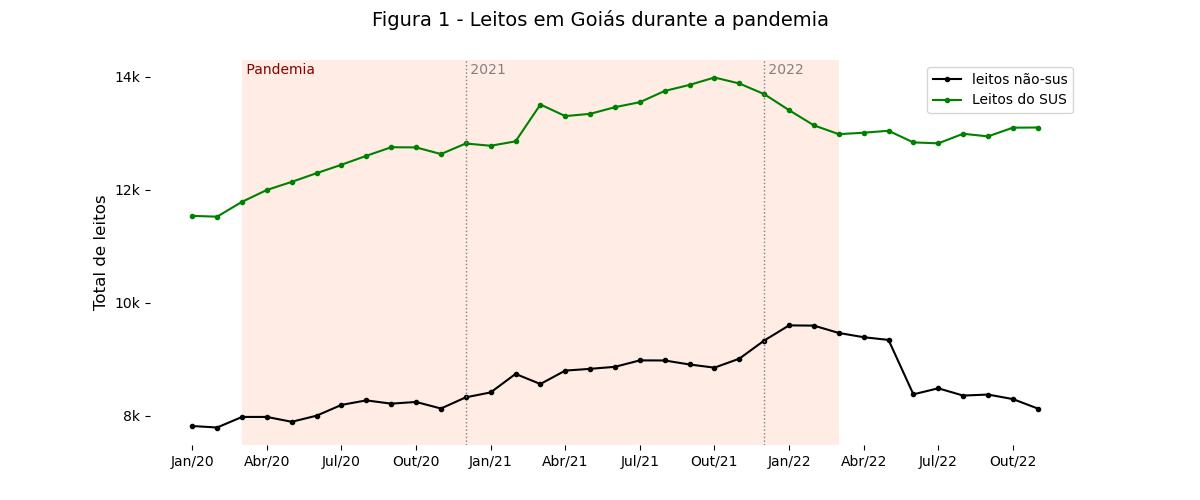

In [14]:
display(Image(filename='images/TotalvsSUS.jpg'))


- Legenda:  No eixo y temos o total de leitos em que os valores apresentados estão entre 9k e 14k onde o 'k' representa 1000. No eixo x temos em sequência os meses entre 2020 e 2022. Em verde temos a Quantidade de leitos no SUS , em preto a quantidade total de leitos. Os dados vão de Janeiro de 2020 até Novembro de 2022. No Retângulo vermelho temos marcado o período em que considero que uma maior quatidade de leitos foi necessário, esse período vai de Março de 2020 até Março de 2022.


- Interpretação: Podemos observar que a quantidade total de leitos no SUS é superior a quantidade de leitos na iniciativa privada para o período de tempo apresentado. Também podemos observar que há um crescimento no número de leitos durante o período da pandemia. E próximo ao final da pandemia temos uma redução em ambas as quantidades.

##### 1.1 Comparando diferenças estatísticas

##### 1.1.1 Analisando o estado como um todo

Queremos comparar se existe diferença significativa entre as quantidades de leitos no SUS e a quantidade de leitos não-SUS. Inicialmente testaremos as quantidade em Goiás como um todo ao longo do tempo. Para isso o primeiro passo é analisar se os dados são paramétricos. Aplicaremos o Teste de Shapiro Wilk nos dados para isso.

In [31]:
df = pd.read_csv('database/processed/df2_base_sus.csv')

w_stat, p_val1 = stats.shapiro(df['QT_EXIST'])
w_stat, p_val2 = stats.shapiro(df['QT_SUS'])
print(f'p-valor do teste de shapiro para leitos de leitos não-sus p = {p_val1} \npara quantidade de leitos do SUS p = {p_val2}')

p-valor do teste de shapiro para leitos de leitos não-sus p = 0.06914520263671875 
para quantidade de leitos do SUS p = 0.2351619005203247


Como o p-valor para ambas as distribuições é superior a 0.05, podemos aceitar a hipótese nula de que os dados são de uma distribuição normal e concluir que os dados são paramétricos. Em seguida realizaremos o teste t de student para checar se há uma diferença significativa entre o total e leitos e a quantidade de leitos pelo SUS. Para isso estamos considerando a quantidade de leitos como um total no estado.

In [35]:
u_stat, p_val = stats.ttest_rel(df['QT_EXIST'], df['QT_SUS'])
print(f'p-valor do teste t de student é p = {p_val}')

p-valor do teste t de student é p = 1.20693560617434e-35


Como o valor-p é menor do que 0.05, podemos rejeitar a hipótese nula de que os leitos SUS e os leitos não-SUS não tem diferença, com isso, concluímos que há uma diferença significativa na média de leitos não-SUS em Goiás e a quantidade de leitos oferecidos pelo SUS quando observamos o estado com um todo ao longo do tempo.

##### 1.1.2 Comparando cidade a cidade
Agora iremos realizar o teste estatístico observando a diferença por cidade, ao inves da diferença total. Novamente precisamos analisar se os dados são paramétricos. Aplicaremos o Teste de Shapiro Wilk nos dados para isso.

In [37]:
df = pd.read_csv('database/processed/df_base.csv')

In [40]:
df2 = df.groupby(['CODUFMUN'])[['QT_EXIST','QT_SUS','QT_EXIST0']].sum().reset_index()
_ , p_val = stats.shapiro(df2['QT_EXIST'])
_ , p_val2 = stats.shapiro(df2['QT_SUS'])

print(f'p-valor do teste de shapiro para total de leitos p = {p_val1} \n para quantidade de leitos do SUS p = {p_val2}')

p-valor do teste de shapiro para total de leitos p = 0.06914520263671875 
 para quantidade de leitos do SUS p = 8.933766094045999e-29


como um dos valores é inferior a 0.05, rejeitamos a hipótese nula e podemos considerar os dados como não paramétricos devido aos resultados do teste de shapiro para o SUS. Com isso agora aplicaremos o teste de Wilcoxon que é uma alternativa não paramétrica ao teste t pareado.

In [67]:

_, p_val = stats.wilcoxon(df2['QT_EXIST'], df2['QT_SUS'])
print(f'p-valor do teste de Wilcoxon p = {p_val}')

p-valor do teste de Wilcoxon p = 2.9808361223215055e-26


Como o valor-p é menor do que 0.05, podemos rejeitar a hipótese nula de que as duas colunas são da mesma distribuição e concluir que há uma diferença significativa entre a distribuição de leitos de leitos não-SUS de leitos oferecidos pelo SUS.

Conclusão: Há uma diferença na quantidade de leitos não-SUS e pelos SUS para o estado de Goiás. Podemos observar esse diferença quando analisamos o estado como um todo ou se analisarmos cidade a cidade.

##### 1.2 Correlação entre dados

In [44]:
r, p_val1 = stats.pearsonr(df2['QT_EXIST'], df2['QT_SUS'])
r2, p_val1 = stats.pearsonr(df2['QT_EXIST0'], df2['QT_SUS'])
print(f'r1 = {r}, r2 = {r2}')

r1 = 0.972074990988193, r2 = 0.9920260905128245


Ao testarmos a correlação entre a quantidade de leitos SUS e leitos não-SUS ao longo do tempo cidade por cidade, observamos uma correlação forte (r = 0.97). Também observamos uma correlação muito forte (r = 0.99) quando observarmos essa relação cidade a cidade.

##### 1.3 Variação da quantidade de leitos das cidades com maior quantidade de leitos

##### 1.3.1 Comparando diferenças estatísticas

Essa correlação e diferença estatística também é observada se compararmos individualmente apenas as 20 cidades com maior quantidade total de leitos antes de pandemia?


In [45]:
# Gerando lista das 20 cidades com maior quantidade de leitos
df_pivot = pd.read_csv('database/processed/df_pivot.csv')
MUNlist = df_pivot['CODUFMUN'].head(20)

# Gerando novos dataframes com apenas as 20 cidades
new_df = df[df['CODUFMUN'].isin(MUNlist)]
new_df2 = df2[df2['CODUFMUN'].isin(MUNlist)]

In [46]:
u_stat, p_val = stats.mannwhitneyu(new_df['QT_EXIST'], new_df['QT_SUS'])
print(f' O p-valor encontradono teste de Mann Whitneyu é {p_val}')

 O p-valor ecnontradono teste de Mann Whitneyu é 0.0


In [47]:
z_stat, p_val = stats.wilcoxon(new_df2['QT_EXIST'], new_df2['QT_SUS'])
print(f' O p-valor encontrado no teste de Wilcoxon é {p_val}')

 O p-valor encontrado no teste de Wilcoxon é 1.9073486328125e-06


Conclusão: Para ambos os casos o p-valor encontrado é inferior a 0.05 e portanto novamente rejeitamos a hipótese nula e consideramos as distribuições diferentes.

##### Total de leitos em Goiás entre 2020 e 2022

Tendo em vista que a quantidade de leitos no SUS e totais estão correlacionadas, a partir daqui analisaremos os dados referentes a quantidade de leitos totais ao longo do tempo. A figura 2 abaixo representa a imagem que utilizaremos para comparações.

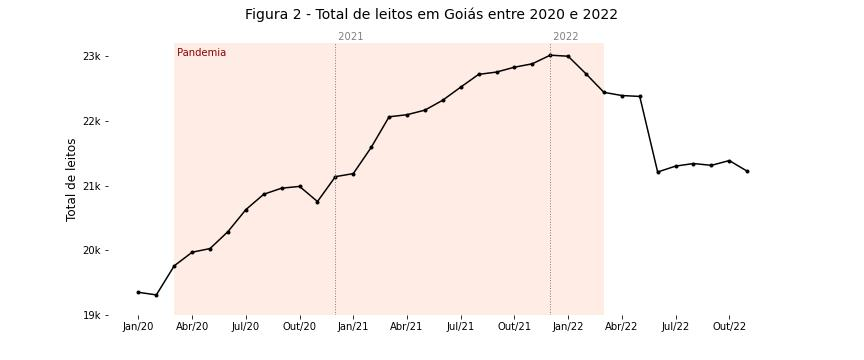

In [7]:
display(Image(filename='images/Total.jpg'))

- Legenda: No eixo y temos o total de leitos em que os valores apresentados estão entre 19k e 23k onde o 'k' representa 1000. No eixo x temos em sequência os meses entre 2020 e 2022. No gráfico temos em preto a quantidade total de leitos entre 2020 e 2022 para todos os meses, exceto deembro de 2022. No Retângulo vermelho temos marcado o período em que considero que uma maior quatidade de leitos foi necessário, esse período vai de Março de 2020 até Março de 2022.

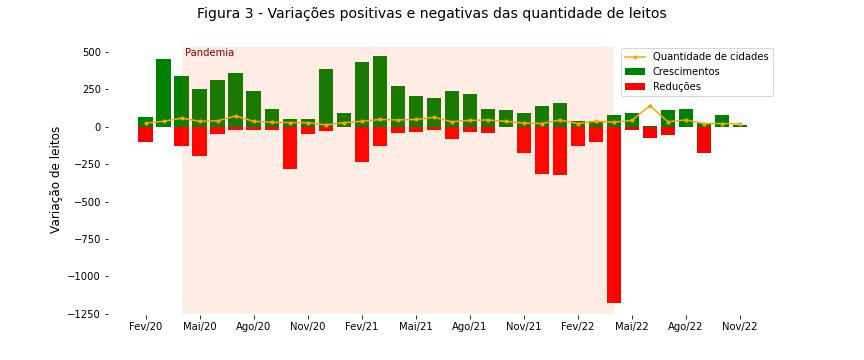

In [9]:
display(Image(filename='images/Variacoes_sub.jpg'))

- Legenda: No eixo y temos a variação de leitos em que para cada período de 1 mês. Temos a soma das variações positivas de leios em verde e a soma da variações negativas em vermelho. No eixo x temos em sequência os meses entre 2020 e 2022. Na linha laranja temos um representação de quantas cidades tiveram alterações na quantidade de leitos naquele mês. No Retângulo vermelho temos marcado o período em que considero que uma maior quatidade de leitos foi necessário, esse período vai de Março de 2020 até Março de 2022.

- Interpretação: Podemos obversar que temos momentos de aumento no numero de leitos, momentos e redução e momentos de redistribuição. Por exemplo em Março de 2020 tivemos praticamente apenas aumento no número de leitos. Ja em Maio de 2020, apenas te termos um aumento no numero absoluto de leitos, podemos observar uma redistribuição no número de leitos. Já em Abril de 2020 podemos observar uma redução de leitos com destaque no gráfico. Em Junho de 2020 e Julho de 2020 temos uma quantidade próxima de aumento de leitos, mas em Julho temos uma maior quantidade de cidades que está tendo essa alteração, logo podemos concluir que temos um aumento de leitos mais distribuido do que em Junho.

___

##### Períodos de redução dos leitos em Goiás


Observando os momentos de declínio na capacidade hospitalar instalada

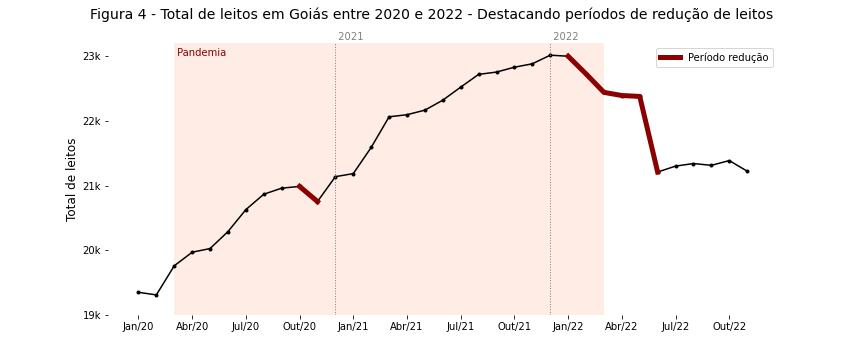

In [10]:
display(Image(filename='images/Total_Reducao.jpg'))

- Legenda: Destacado em vermelho dois períodos de redução da quantidade de leitos disponíveis no estado. No eixo y temos o total de leitos. No eixo x temos em sequência os meses entre 2020 e 2022. No gráfico temos em preto a quantidade total de leitos entre 2020 e 2022 para todos os meses, exceto deembro de 2022.

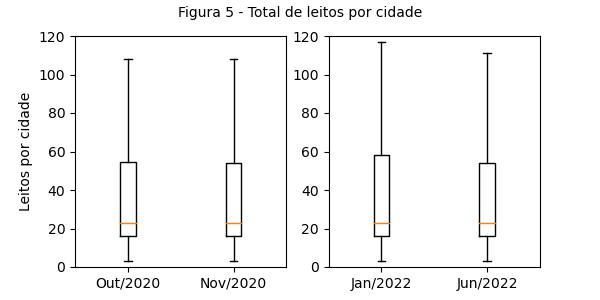

In [8]:
display(Image(filename='images/reducao.jpg'))

- Legenda: A figura apresenta os boxplots para os dois períodos de redução destacados na figura 4. No eixo y temos o número de leitos, e no eixo x temos a marcação de cada boxplot. Para ambas as figuras os outliers foram escondidos para facilitar a visualização.

- Interpretação: Podemos identificar que no período de Janeiro a Junho de 2022 a redução pode ser observada na distribuição dos dados. Já no outro período não conseguimos identificar diferença.

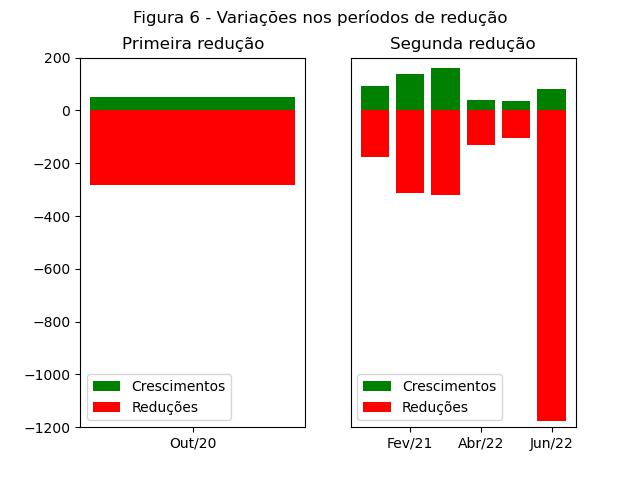

In [6]:
display(Image(filename='images/reducao_bar.jpg'))

- Legenda: Temos 1 figura com barplots para cada período de redução, a figura 1 para a redução do mês de Outubro de 2020 e a figura 2 para a redução de Janeiro a Junho de 2022. Em vermelho os leitos que foram encerrados naquele mês, em verde os leitos que foram abertos naquele mês. 

- Interpretação: Para ambos os períodos temos crescimentos e reduções. a principal redução do segundo período aconteceu em Junho de 2022.

Realizando comparações estatísticas para os períodos

Outubro - Novembro de 2020

In [80]:
# Baixnando o banco de dados
df = pd.read_csv('database/processed/df_base.csv')

# Selecionando o período
df_antes = df[df.date == '2020-09']
df_depois = df[df.date == '2020-10']


In [63]:
# Agrupando os datasets
df2_antes = df_antes.groupby(['CODUFMUN'])[['QT_EXIST','QT_SUS','QT_EXIST0']].sum().reset_index()
df2_depois = df_depois.groupby(['CODUFMUN'])[['QT_EXIST','QT_SUS','QT_EXIST0']].sum().reset_index()

In [68]:
# Teste de Normalidade
_ , p_val = stats.shapiro(df2_antes['QT_EXIST0'])
_ , p_val2 = stats.shapiro(df2_depois['QT_EXIST0'])

print(f'p-valor do teste de shapiro para total de leitos p = {p_val1}\n para quantidade de leitos do SUS p = {p_val2}')

p-valor do teste de shapiro para total de leitos p = 3.5649328744182715e-07
 para quantidade de leitos do SUS p = 1.1606968292064528e-28


In [69]:
# Comparando diferença estatística
_, p_val = stats.wilcoxon(df2_antes['QT_EXIST0'], df2_depois['QT_EXIST0'])
print(f'p-valor do teste de Wilcoxon p = {p_val}')

p-valor do teste de Wilcoxon p = 0.37215383020417214


/Users/Cesar-mac/miniconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:3351: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Como o valor-p não é menor do que 0.05, podemos aceitar a hipótese nula de que as duas colunas são da mesma distribuição e concluir que não há uma diferença significativa entre a distribuição de leitos de leitos não-SUS de leitos oferecidos pelo SUS para o intervalo de teste

Janeiro ate Junho de 2022

In [71]:
df = pd.read_csv('database/processed/df_base.csv')

# Selecionando o período
df_antes = df[df.date == '2022-01']
df_depois = df[df.date == '2022-06']

In [77]:
# Agrupando os dados
df2_antes = df_antes.groupby(['CODUFMUN'])[['QT_EXIST','QT_SUS','QT_EXIST0']].sum().reset_index().head(192)
df2_depois = df_depois.groupby(['CODUFMUN'])[['QT_EXIST','QT_SUS','QT_EXIST0']].sum().reset_index().head(192)

In [78]:
# Teste de normalidade
_ , p_val = stats.shapiro(df2_antes['QT_EXIST0'])
_ , p_val2 = stats.shapiro(df2_depois['QT_EXIST0'])

print(f'p-valor do teste de shapiro para total de leitos p = {p_val1}\n para quantidade de leitos do SUS p = {p_val2}')

p-valor do teste de shapiro para total de leitos p = 3.5649328744182715e-07
 para quantidade de leitos do SUS p = 4.8445233025636484e-29


In [79]:
# Comparando diferença estatística
_, p_val = stats.wilcoxon(df2_antes['QT_EXIST0'], df2_depois['QT_EXIST0'])
print(f'p-valor do teste de Wilcoxon p = {p_val}')

p-valor do teste de Wilcoxon p = 0.9127642444566022


Como o valor-p é maior do que 0.05, podemos aceitar a hipótese nula de que os dois meses tem a mesma distribuição e concluir que não há uma diferença significativa entre a distribuição de leitos de leitos não-SUS de leitos oferecidos pelo SUS para o intervalo de teste

#### Período de crescimento dos leitos em Goiás

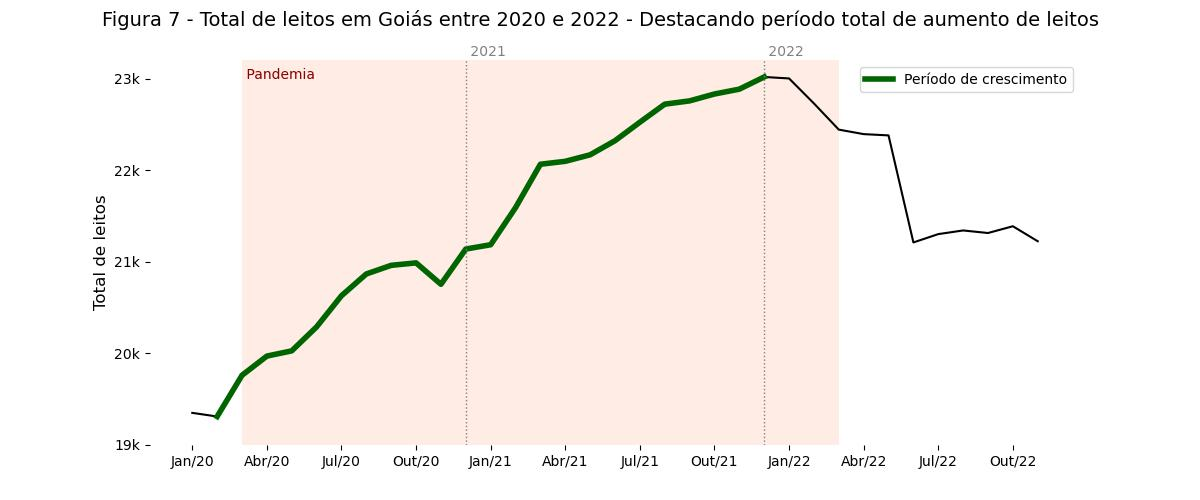

In [10]:
display(Image(filename='images/Total_Aumento.jpg'))

- Legenda: Destacado em vermelho o período de aumento da quantidade de leitos disponíveis no estado. No eixo y temos o total de leitos. No eixo x temos em sequência os meses entre 2020 e 2022. No gráfico temos em preto a quantidade total de leitos entre 2020 e 2022 para todos os meses, exceto dezembro de 2022.

- Interpretação: Temos um aumento de leitos totais no estado, mas também podemos observar que em alguns meses temos um período de redução.

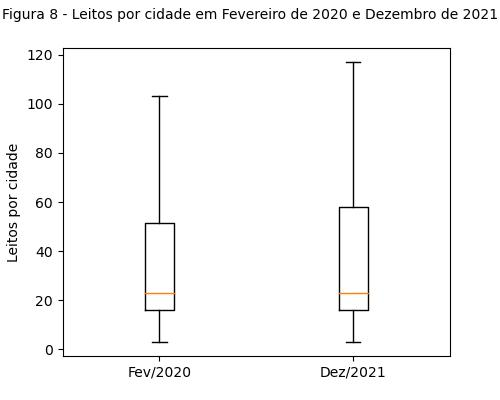

In [12]:
display(Image(filename='images/aumento.jpg'))

- Legenda: A figura apresenta o boxplot para o período de aumento destacado na figura 7. No eixo y temos o número de leitos, e no eixo x temos a marcação de cada boxplot. Para ambas as figuras os outliers foram escondidos para facilitar a visualização.

- Interpretação: Podemos identificar que no período de Fevereiro de 2020 a Dezembro de 2021 o aumento pode ser observado na distribuição dos dados.

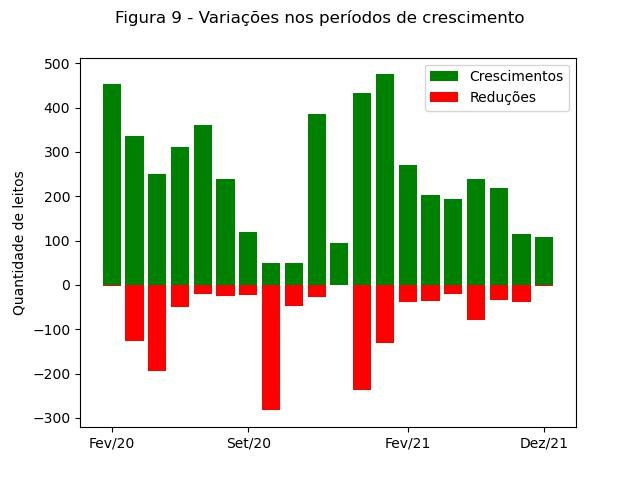

In [49]:
display(Image(filename='images/aumento_bar.jpg'))

- Legenda: barplots para o período de aumento no número de leitos. Em vermelho os leitos que foram encerrados naquele mês, em verde os leitos que foram abertos naquele mês. 

- Interpretação: Para ambos os períodos temos crescimentos e reduções. O maior crescimento é em Fevereiro de 2020, no qual muitos leitos foram abertos e poucos fechados. Enquanto nos meses seguintes observamos uma redistribuição. A partide de Janeiro de 2021 podemos observar também uma tendencia de alta.

---

## Conclusões
- Observamos que houve um aumento na quantidade de leitos SUS e não-SUS para o estado de Goiás durante a pandemia.
- Observamos que a quantidade total de leitos no SUS é superior a quantidade de leitos na iniciativa privada para o período de tempo apresentado.
- Testamos estatisticamente a diferença entre a quantidade de leitos SUS e não-SUS durante a pandemia, e observamos que há diferença significativa Quando observamos o estado como um todo e quando observamos cidade por cidade. O mesmo resultado é observado quando testamos apenas as 20 cidades com mais leitos.
- Observamos também que temos uma correlação forte entre a quantidade de leitos SUS e de leitos não-SUS e entre a quantidade de leitos SUS e de leitos não-SUS quando observamos cidade por cidade. 
- Através da figura 3 podemos observar que há meses de aumento no números de leitos, meses de redistribuição de leitos no estado e meses de redução no números de leitos.
- Ao analisarmos os dois momentos de redução de dados em destaque na figura 4, podemos observar uma redução através do boxplot para o segundo momento na figura 5, mas não observamos uma redução para o primeiro momento. 
- Não obtivemos diferença estatística para o momento de redução no total de leitos no que aconteceu no durante a pandemia, mas pudemos observar uma diferença significativa para a redução que ocorre após a pandemia.
- Podemos observar através da figura 6 que mesmo durante o segundo momento de redução de leitos, temos também a abertura de leitos ocorrendo, ou seja, uma redeistribuição de leitos.
- Através da figura 8 podemos observar que o aumento de leitos que ocorreu durante a pandemia foi distribuído entre as cidades. E que mesmo durante esse momento temos momentos de redução de leitos e de redistribuição.